# Graia MNIST digits example

In [1]:
#%pip install numpy
import numpy as np
# %pip install matplotlib
import matplotlib.pyplot as plt
# %pip install tensorflow
# %pip install keras
import keras

2024-10-27 02:57:11.097473: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 02:57:11.097926: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 02:57:11.099756: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 02:57:11.105741: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-27 02:57:11.118514: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 10
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [82]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, learning_rate=0.001, relu_slope=100.0, seed=123456)
# plt.imshow(model.hidden_weights[0], cmap="coolwarm")
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [83]:
model.fit(train_images, train_labels, epochs=400)

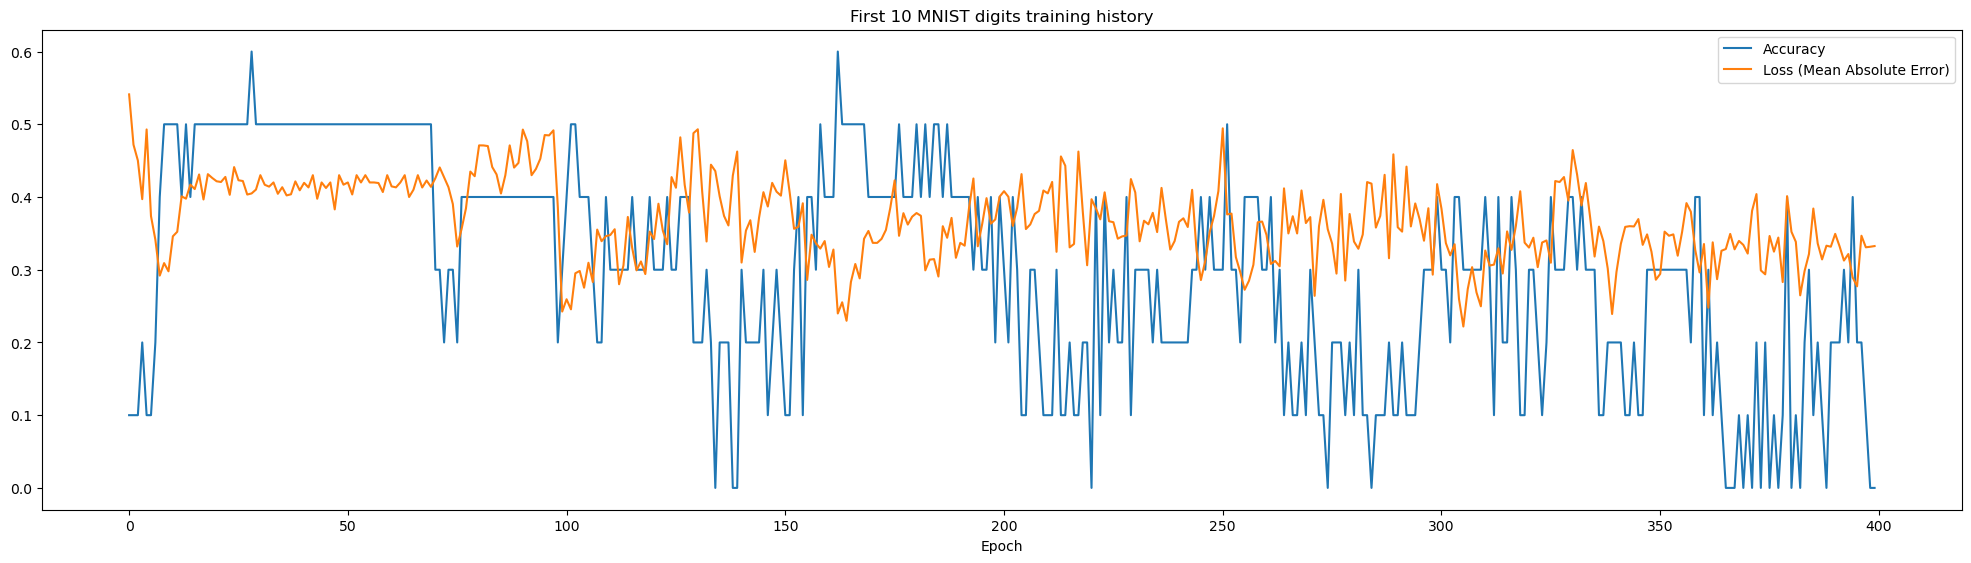

In [84]:
fig = plt.figure().add_axes([0,0,3,1])
fig.plot(model.history['accuracy'])
fig.plot(model.history['loss'])
plt.xlabel("Epoch")
plt.title(f"First {N} MNIST digits training history")
plt.legend(["Accuracy", "Loss (Mean Absolute Error)"])
plt.show()

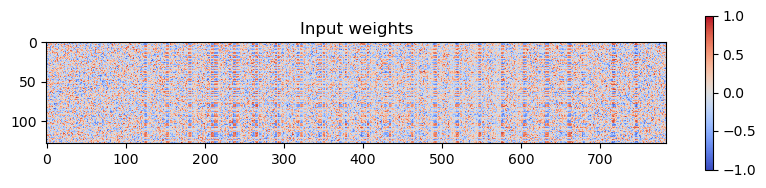

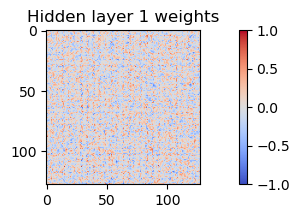

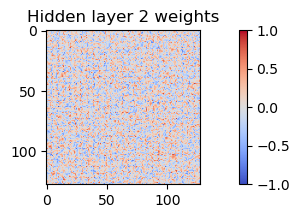

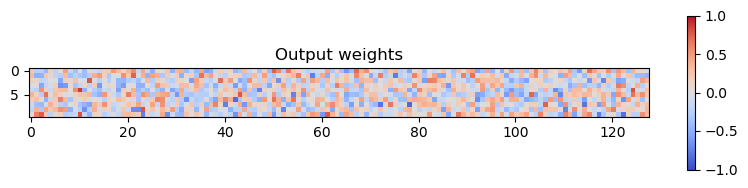

In [85]:
def show_weights(weights, title=None):
    plt.figure(figsize = (10, 2))
    plt.imshow(weights, vmin=-1, vmax=1, cmap="coolwarm")
    plt.colorbar(orientation="vertical")
    plt.title(title)
    plt.show()

show_weights(model.input_weights, "Input weights")
for l in range(model.config["layers"] - 1):
    show_weights(model.hidden_weights[l], f"Hidden layer {l + 1} weights")
show_weights(model.output_weights, "Output weights")
# model.output_weights

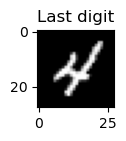

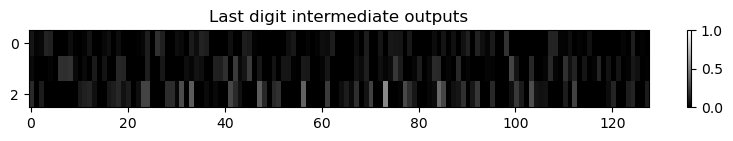

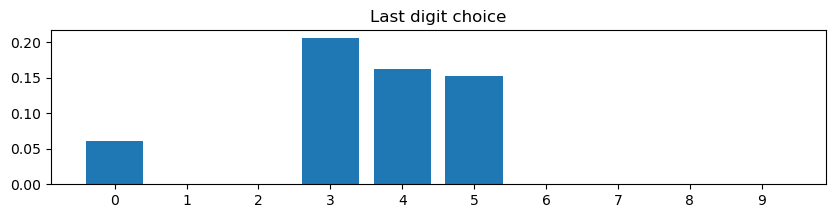

--> 3


In [86]:
plt.figure(figsize = (1, 1))
plt.imshow(train_images[N-1].reshape(28, 28), cmap="grey")
plt.title("Last digit")
plt.show()
# for l in range(model.config["layers"]):
#     print(np.round(model.last_intermediate_outputs[l], 2))
plt.figure(figsize = (10, 1))
plt.imshow(model.last_intermediate_outputs, vmin=0, vmax=1, cmap="grey", aspect="auto")
plt.colorbar(orientation="vertical")
plt.title("Last digit intermediate outputs")
plt.show()

plt.figure(figsize=(10,2 ))
plt.bar([str(i) for i in range(10)],(model.last_outputs))
plt.title("Last digit choice")
plt.show()
# print("".join([f"{i}   {v:.3f}\n" for i, v in enumerate(model.last_outputs)]))
print("-->\033[1m\033[96m", model.last_answer)